<a href="https://colab.research.google.com/github/KingJayant/Sentiment-Analysis/blob/main/NLP_in_Python_4_(Sentiment_Analysis)_(7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [4]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
LETTERKENNY,"Letterkenny concludes with its series finale, ...",LETTERKENNY – S12E06 – OVER AND OUT
MASTERS OF THE AIR,"“Masters of the Air,” a 2024 American war dram...",MASTERS OF THE AIR – S01E01 – PART ONE
MONSIEUR SPADE,Monsieur Spade\nSeason 1 Episode 2\nEpisode Ti...,MONSIEUR SPADE – EPISODE 2
SLOW HORSES,Episode Title: Footprints\nSeries: Slow Horses...,SLOW HORSES – S03E06 – FOOTPRINTS
TRUE DETECTIVE,True Detective\nSeason 4 Episode 3\nEpisode Ti...,TRUE DETECTIVE – S04E03 – PART 3


In [5]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
LETTERKENNY,"Letterkenny concludes with its series finale, ...",LETTERKENNY – S12E06 – OVER AND OUT,0.126918,0.555221
MASTERS OF THE AIR,"“Masters of the Air,” a 2024 American war dram...",MASTERS OF THE AIR – S01E01 – PART ONE,0.070557,0.466918
MONSIEUR SPADE,Monsieur Spade\nSeason 1 Episode 2\nEpisode Ti...,MONSIEUR SPADE – EPISODE 2,0.045698,0.457827
SLOW HORSES,Episode Title: Footprints\nSeries: Slow Horses...,SLOW HORSES – S03E06 – FOOTPRINTS,-0.078023,0.507012
TRUE DETECTIVE,True Detective\nSeason 4 Episode 3\nEpisode Ti...,TRUE DETECTIVE – S04E03 – PART 3,-0.090223,0.574288


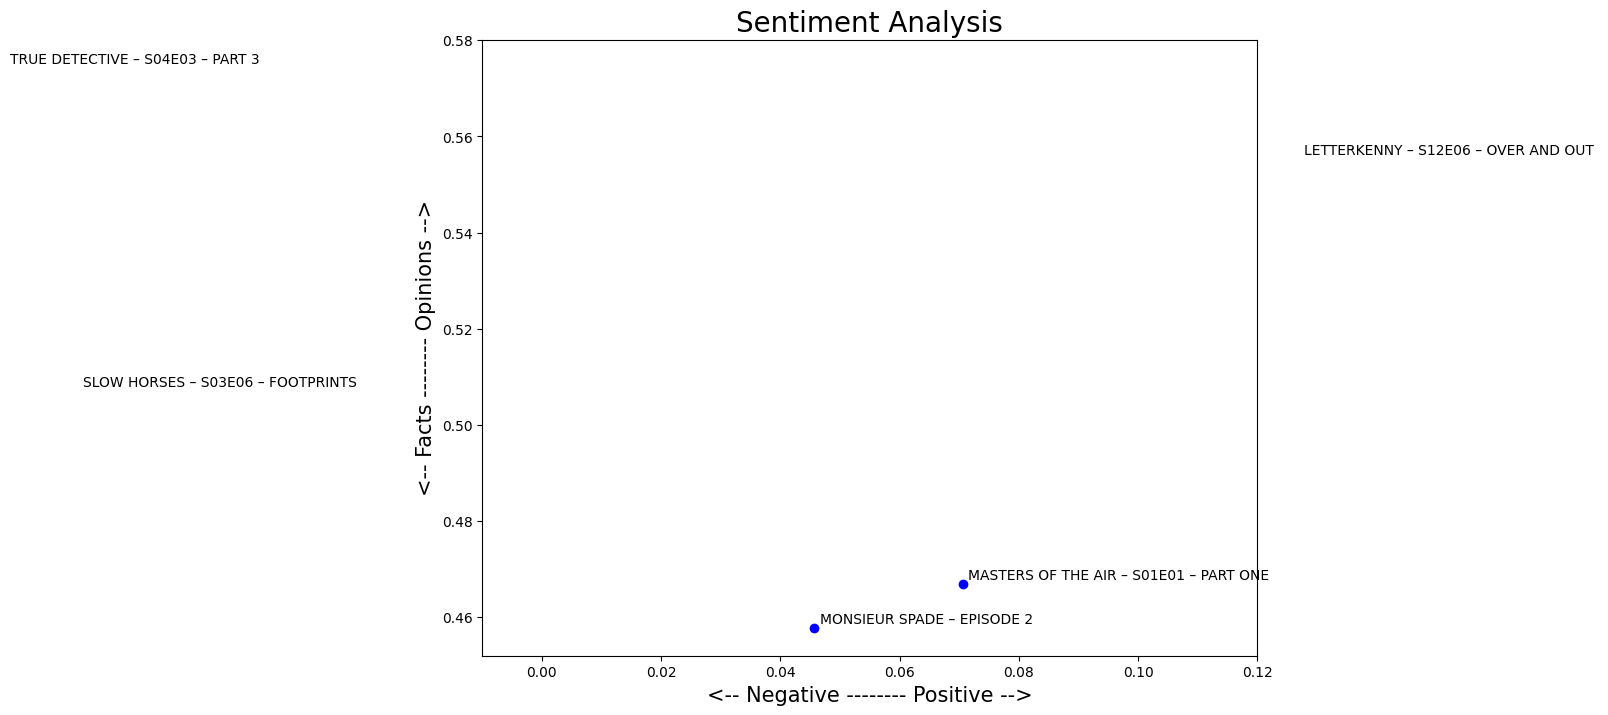

In [6]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12)

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [7]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [8]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
LETTERKENNY,"Letterkenny concludes with its series finale, ...",LETTERKENNY – S12E06 – OVER AND OUT,0.126918,0.555221
MASTERS OF THE AIR,"“Masters of the Air,” a 2024 American war dram...",MASTERS OF THE AIR – S01E01 – PART ONE,0.070557,0.466918
MONSIEUR SPADE,Monsieur Spade\nSeason 1 Episode 2\nEpisode Ti...,MONSIEUR SPADE – EPISODE 2,0.045698,0.457827
SLOW HORSES,Episode Title: Footprints\nSeries: Slow Horses...,SLOW HORSES – S03E06 – FOOTPRINTS,-0.078023,0.507012
TRUE DETECTIVE,True Detective\nSeason 4 Episode 3\nEpisode Ti...,TRUE DETECTIVE – S04E03 – PART 3,-0.090223,0.574288


In [9]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

list_pieces

[['Letterkenny concludes with its series finale, Season 12 Episode 6, “Over and Out,” delivering a heartfelt and humorous farewell. The episode is filled with fun callbacks and a sense of contentment among the residents, embracing the notion that sometimes being where you are is exactly where you need to be. The finale reflects the series’ spirit of small-town life, with its quirky characters and unique humor. The episode starts with a nostalgic cold open discussing local gossip and bird misconceptions, capturing the show’s typical banter. It then revisits the previous night’s events, where the gang successfully thwarts the Degens with a surprise attack, hinting at the never-ending battle between them. Amidst this, we see dream sequences, plans for reviving past endeavors like Fartbook and a rave, and an acknowledgment of the evolving relationships among the various groups in Letterkenny. The Skids attempt to organize another rave, considering everyone’s music tastes, and eventually de

In [10]:
# The list has 10 elements, one for each transcript
len(list_pieces)

5

In [11]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [12]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[0.07101449275362319,
  0.06350931677018634,
  0.09642857142857143,
  0.14652777777777776,
  0.3592013888888889,
  -0.002247807017543849,
  0.049751984126984124,
  0.3322691197691197,
  0.0959201388888889,
  -0.0889455782312925],
 [0.09263183785911058,
  0.16283692436036185,
  0.0825779317408782,
  -0.009604794298671861,
  0.07860119047619048,
  0.02451707097933514,
  0.16230353535353534,
  0.14898221634332742,
  -0.02273084682806905,
  -0.04037583056478405],
 [-0.02569444444444445,
  -0.018231074481074486,
  0.016476671476671468,
  -0.053831845238095234,
  0.14849353321575542,
  -0.004687500000000008,
  0.20426587301587298,
  0.20127033885654577,
  0.10575757575757576,
  -0.06972789115646259],
 [-0.02163299663299664,
  -0.0830952380952381,
  -0.10048024891774893,
  -0.13485275689223059,
  -0.11464559386973182,
  -0.07325680272108848,
  0.06817580567580563,
  -0.10629578754578757,
  -0.11758958633958633,
  -0.05250412286126573],
 [0.06566445707070706,
  -0.03379629629629631,
  -0.1575

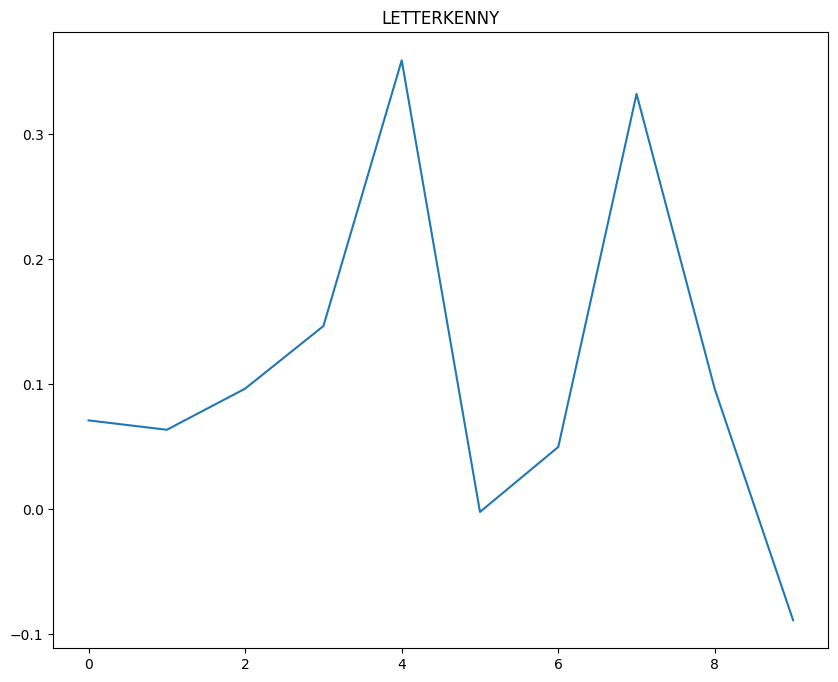

In [13]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

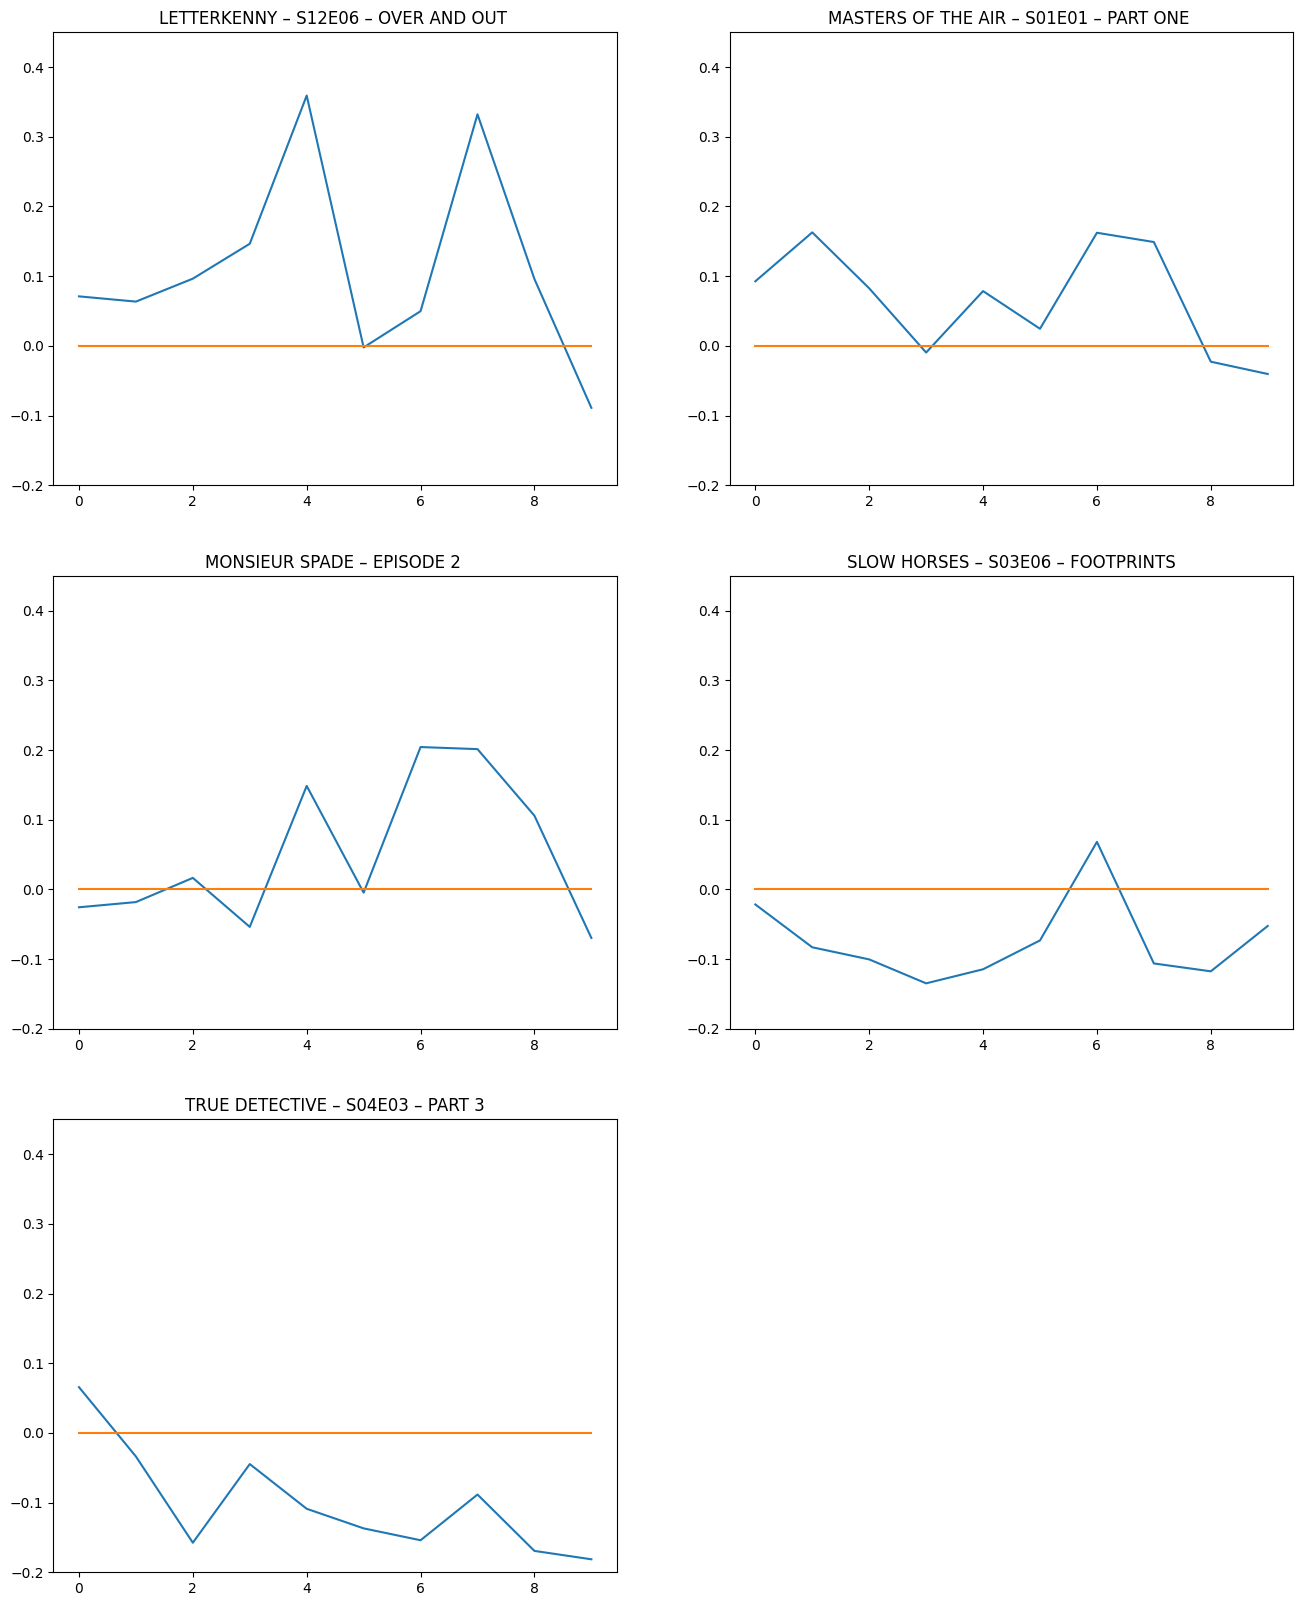

In [14]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 20]

for index, comedian in enumerate(data.index):
    plt.subplot(3, 2, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.45)

plt.show()

In [16]:
#q1 classififcation of series episodes on the basis of polarity and subjectivity

import pprint

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

list_pieces
# Calculate polarity and subjectivity for each episode routine
polarity_transcript_new = []
subjectivity_transcript_new = []

for pieces in list_pieces:
    polarities = [pol(piece) for piece in pieces]
    subjectivities = [sub(piece) for piece in pieces]

    polarity_transcript_new.append(polarities)
    subjectivity_transcript_new.append(subjectivities)

# Calculate average polarity and subjectivity for each series
avg_polarity = [np.mean(polarities) for polarities in polarity_transcript_new]
avg_subjectivity = [np.mean(subjectivities) for subjectivities in subjectivity_transcript_new]

# Classify series based on average polarity
new_polarity_class = ['positive' if polarity > 0 else ('negative' if polarity < 0 else 'neutral') for polarity in avg_polarity]

# Classify series based on average subjectivity
new_subjectivity_class = ['objective' if subjectivity > 0.5 else 'subjective' for subjectivity in avg_subjectivity]

# Update the DataFrame with polarity and subjectivity classifications
data['avg_polarity'] = avg_polarity
data['avg_subjectivity'] = avg_subjectivity

data['new_polarity_class'] = new_polarity_class
data['new_subjectivity_class'] = new_subjectivity_class

# Display the updated DataFrame
pprint.pprint(data)

                                                           transcript  \
LETTERKENNY         Letterkenny concludes with its series finale, ...   
MASTERS OF THE AIR  “Masters of the Air,” a 2024 American war dram...   
MONSIEUR SPADE      Monsieur Spade\nSeason 1 Episode 2\nEpisode Ti...   
SLOW HORSES         Episode Title: Footprints\nSeries: Slow Horses...   
TRUE DETECTIVE      True Detective\nSeason 4 Episode 3\nEpisode Ti...   

                                                  full_name  polarity  \
LETTERKENNY            LETTERKENNY – S12E06 – OVER AND OUT   0.126918   
MASTERS OF THE AIR  MASTERS OF THE AIR – S01E01 – PART ONE   0.070557   
MONSIEUR SPADE                  MONSIEUR SPADE – EPISODE 2   0.045698   
SLOW HORSES               SLOW HORSES – S03E06 – FOOTPRINTS -0.078023   
TRUE DETECTIVE             TRUE DETECTIVE – S04E03 – PART 3 -0.090223   

                    subjectivity  avg_polarity  avg_subjectivity  \
LETTERKENNY             0.555221      0.112343        

### Assignments:
1. Classify all comedian accordig to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.


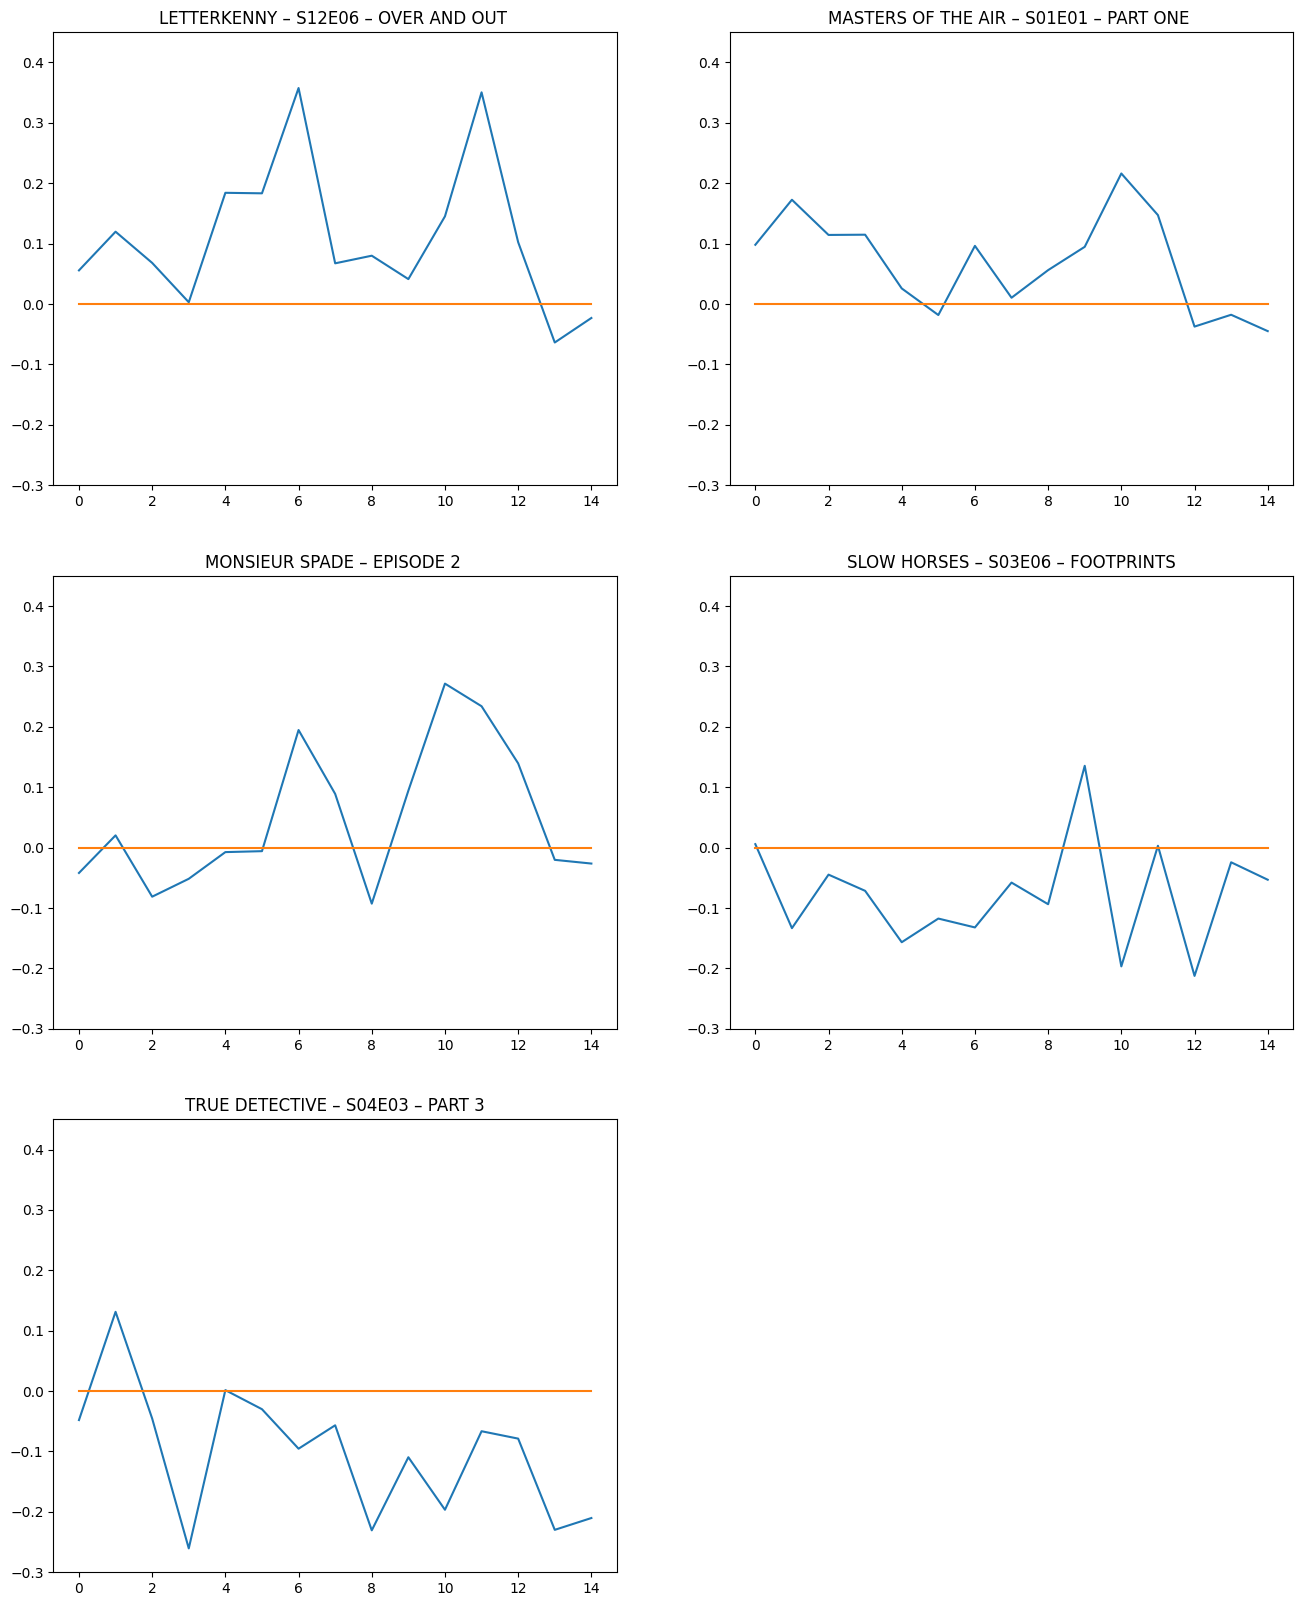

In [20]:
def split_text(text, n=15):
    '''Takes in a string of text and splits into n equal parts, with a default of 15 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

list_pieces




In [18]:

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript



[[0.05572916666666666,
  0.11979166666666667,
  0.06813186813186813,
  0.0029761904761904747,
  0.18418803418803423,
  0.18333333333333332,
  0.35767543859649126,
  0.06742424242424243,
  0.08004807692307692,
  0.04129464285714285,
  0.14523809523809522,
  0.3505511463844797,
  0.10241477272727272,
  -0.06369047619047619,
  -0.02307692307692307],
 [0.09811922311922312,
  0.1726747999475272,
  0.11442139176514178,
  0.11482564616755793,
  0.025846217274788707,
  -0.0181933421516755,
  0.09632936507936508,
  0.010443479193479186,
  0.05616883116883116,
  0.09475130772005773,
  0.21618940368940368,
  0.14726190476190473,
  -0.03733121255848528,
  -0.017746126228269085,
  -0.044834505772005775],
 [-0.04204545454545455,
  0.020216049382716053,
  -0.08132275132275131,
  -0.051697530864197545,
  -0.0075114499027542645,
  -0.005952380952380944,
  0.19464285714285712,
  0.08888888888888889,
  -0.09285714285714286,
  0.09425770308123248,
  0.27149122807017545,
  0.2340297937356761,
  0.139393939

In [ ]:
plt.rcParams['figure.figsize'] = [16, 20]

for index, comedian in enumerate(data.index):
    plt.subplot(3, 2, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,15), np.zeros(15))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.3, ymax=.45)

plt.show()

In [ ]:
def split_text(text, n=5):
    '''Takes in a string of text and splits into n equal parts, with a default of 5 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

list_pieces

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

plt.rcParams['figure.figsize'] = [16, 20]

for index, comedian in enumerate(data.index):
    plt.subplot(3, 2, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,5), np.zeros(5))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.3, ymax=.45)

plt.show()